# Load the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
#from scipy.optimize import minimize
from scipy import integrate
#from iminuit import Minuit
#from iminuit.cost import UnbinnedNLL
from landaupy import landau
from scipy.optimize import curve_fit

import analysis_data
run_info =[]

In [2]:
def landau_distribution(xdata, mu,sigma, A):
    landau = lambda t, mu, sigma, xdata, A : A*np.exp(-t)*np.cos(t*(xdata -mu)/sigma + 2*t/np.pi *np.log(t/sigma) ) / (sigma *  np.pi)
    integral, error = integrate.quad(landau, 0, np.inf, args=(mu,sigma,xdata, A))
    return integral

def landau_distribution_array(xdata,mu, sigma, A):
    return np.array([landau_distribution(x, mu,sigma, A) for x in xdata])

# load data for debugging

In [3]:
############################################ run file 20240821 h5py#####################
#file = 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240821_LED_1.7V_11ns_400_ratio_run0.h5py'
#file = 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240821_LED_1.7V_12ns_400_ratio_run0.h5py'
#file = 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240821_LED_1.7V_13ns_400_ratio_run0.h5py'
#file  = 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240821_LED_1.7V_14ns_400_ratio_run0.h5py'
#file  = 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240821_LED_1.7V_15ns_400_ratio_run0.h5py'
############################################ run file 20240826 h5py###################
#file = 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.175V_50ns_400_ratio_run0.h5py'
#file = 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.175V_47ns_400_ratio_run0.h5py'
#file = 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.175V_48ns_400_ratio_run0.h5py'
#file = 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.175V_49ns_400_ratio_run0.h5py'
#file = 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.175V_46ns_400_ratio_run0.h5py'
#file = 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.130V_65ns_400_ratio_run0.h5py'
#file = 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.13V_60ns_400_ratio_run0.h5py'
#file = 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.13V_61ns_400_ratio_run0.h5py'
#file = 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.13V_63ns_400_ratio_run0.h5py'
#file = 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.13V_63ns_400_ratio_run0_test.h5df'
#file = 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.13V_63ns_400_ratio_run0_debug_area.h5df'
#file = 'outnpy/LV2415_anodereadout_LV2414_dualreadout_20240826_LED_1.7V_17ns_400_ratio_run0_debug_area.h5df'
#file = 'outnpy/lv2415_anode_lv2414_dual_20240829_LED_1.045V_200ns_400_ratio_run0_debug.h5df'
file =  'outnpy/lv2415_anode_lv2414_dual_20240829_LED_1.075V_100ns_400_ratio_run0.h5py'


In [5]:
file_date = file.split('LED_')[0].split('dual_')[1]
led_config = file.split('LED_')[1].split('_400')[0]
file_tag = file_date + led_config
file_tag

'20240829_1.075V_100ns'

In [7]:
df = pd.read_hdf(file, key='winfo')
df[df.Ch==1]

,Ch,TTT,Baseline,Hight,Area_fixrange
1,1,229216,15340,11633,1106.206825
4,1,479212,15339,10148,1076.110939
8,1,729212,15340,11160,1082.761109
10,1,979212,15341,11754,1068.852459
13,1,1229208,15340,12654,1173.966388
...,...,...,...,...,...
372030,1,31002578440,15339,11779,1082.771420
372035,1,31002828436,15340,10724,1103.856068
372037,1,31003078436,15338,11507,1084.792247
372040,1,31003328436,15338,11570,1126.177956


In [8]:
np.mean(df.Hight[df.Ch ==0]), np.max(df.Hight[df.Ch ==0])

(391.97275329597227, 1283)

In [9]:
"""
n =3
wave_0 = df.Wave[:][n]
baseline_0 = df.Baseline[:][n]
st_0 = df.St[:][n]
ed_0 = df.Ed[:][n]
lp_0 = df.Minp[:][n]
ttt_0 =  df.TTT[:][n]
area_0 = df.Area[:][n]

m =1
wave_2 = df.Wave[:][m]
baseline_2 = df.Baseline[:][m]
st_2 = df.St[:][m]
ed_2 = df.Ed[:][m]
lp_2 = df.Minp[:][m]
ttt_2 = df.TTT[:][m]
area_2 = df.Area_fixrange[:][m]
"""

'\nn =3\nwave_0 = df.Wave[:][n]\nbaseline_0 = df.Baseline[:][n]\nst_0 = df.St[:][n]\ned_0 = df.Ed[:][n]\nlp_0 = df.Minp[:][n]\nttt_0 =  df.TTT[:][n]\narea_0 = df.Area[:][n]\n\nm =1\nwave_2 = df.Wave[:][m]\nbaseline_2 = df.Baseline[:][m]\nst_2 = df.St[:][m]\ned_2 = df.Ed[:][m]\nlp_2 = df.Minp[:][m]\nttt_2 = df.TTT[:][m]\narea_2 = df.Area_fixrange[:][m]\n'

In [10]:
"""
#analysis_data.plot_waveform(wave_0, baseline_0, st_0, ed_0, lp_0,90,200, ch='Anode',ttt=ttt_0, area=area_0)
#analysis_data.plot_waveform(wave_2, baseline_2, st_2, ed_2, lp_2,80,200, pmt='LV2415',  ttt=ttt_2, area=area_2)
"""

"\n#analysis_data.plot_waveform(wave_0, baseline_0, st_0, ed_0, lp_0,90,200, ch='Anode',ttt=ttt_0, area=area_0)\n#analysis_data.plot_waveform(wave_2, baseline_2, st_2, ed_2, lp_2,80,200, pmt='LV2415',  ttt=ttt_2, area=area_2)\n"

In [11]:
area_ch0 = df.Area_fixrange[df.Ch==1 ].astype(np.float64).to_numpy()
area_ch1 = df.Area_fixrange[df.Ch==0 ].astype(np.float64).to_numpy()
area_ch2 = df.Area_fixrange[df.Ch==2 ].astype(np.float64).to_numpy()


In [12]:
area_ch0, area_ch1, area_ch2

(array([1106.20682545, 1076.11093927, 1082.76110939, ..., 1084.79224662,
        1126.17795649, 1084.12207444]),
 array([33.76997339, 32.45876772, 22.04625214, ..., 19.46240568,
        30.76191333, 29.14218869]),
 array([1106.20682545, 1076.11093927, 1076.11093927, ..., 1084.79224662,
        1126.17795649, 1084.12207444]))

# define the range and number of bins to fit histogram of area distribution

In [13]:
ratio = area_ch0/area_ch1
mean_ch0 = np.mean(area_ch0)
std_ch0 = np.std(area_ch0)
nbins_ch0 = round(np.max(area_ch0)-np.min(area_ch0))
left_edge_ch0 = np.min(area_ch0)
right_edge_ch0 = np.max(area_ch0)
amplitude_ch0 = len(area_ch0)

mean_ch1 = np.mean(area_ch1)
std_ch1 = np.std(area_ch1)
nbins_ch1 = round(np.max(area_ch1)-np.min(area_ch1))
left_edge_ch1 = np.min(area_ch1)
right_edge_ch1 = np.max(area_ch1)
amplitude_ch1 = len(area_ch1)

mean_ch2 = np.mean(-area_ch2)
std_ch2 = np.std(-area_ch2)
nbins_ch2 = round(np.max(-area_ch2)-np.min(-area_ch2))
left_edge_ch2 = np.min(-area_ch2)
right_edge_ch2 = np.max(-area_ch2)
amplitude_ch2 = len(-area_ch2)
   


In [14]:
mean_ch2, std_ch2 ,left_edge_ch2 , right_edge_ch2, nbins_ch2 , amplitude_ch2

(-1099.7564897913123,
 110.91146156466769,
 -1248.7163625115993,
 -9.795477625946447,
 1239,
 124015)

array([-1.        , -1.        , -1.00617982, ..., -1.        ,
       -1.        , -1.        ])

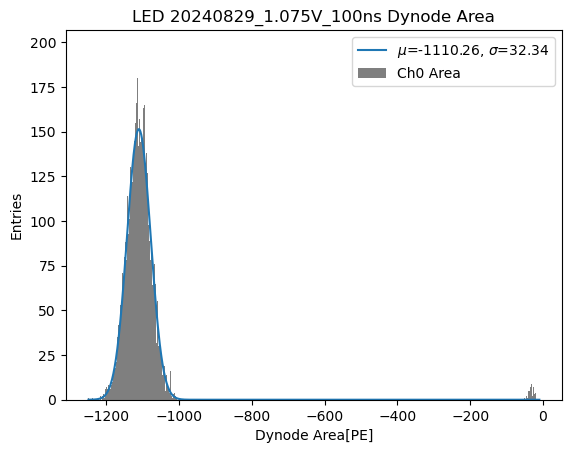

Ch2 Area Fit: mu= -1110.26, sigma =32.34


In [16]:
hist, bins_edges = np.histogram( -area_ch2, bins= nbins_ch2*10, range=(left_edge_ch2, right_edge_ch2))
bins = (bins_edges[:-1] + bins_edges[1:])/2
popt, pcov = curve_fit(analysis_data.gaussian, bins, hist, p0=[amplitude_ch2, mean_ch2,  std_ch2])
x_fit = np.linspace(np.min(bins), np.max(bins), 1000)
y_fit = analysis_data.gaussian(x_fit, *popt)
plt.plot(x_fit, y_fit, label=r'$\mu$={:.2f}, $\sigma$={:.2f}'.format(popt[1], popt[2]))
#plt.hist(area_ch0, bins=nbins_ch0, range=(left_edge_ch0, right_edge_ch0),  color='black', density=False, alpha=0.5, label='Ch0 Area')
plt.hist( -area_ch2, bins=nbins_ch2*10, range=(left_edge_ch2, right_edge_ch2),  color='black', density=False, alpha=0.5, label='Ch0 Area')
plt.xlabel('Dynode Area[PE]')
plt.ylabel('Entries')
plt.title(r'LED {} Dynode Area'.format(file_tag))
plt.legend()
plt.savefig(r'./res/LED_{}_Ch2_Area_fit_{:.2f}_PE_sigma_{:.2f}.png'.format(file_tag,popt[1], popt[2]),dpi=300)
plt.show()
print(r'Ch2 Area Fit: mu= {:.2f}, sigma ={:.2f}'.format(popt[1], popt[2]))
Ch2_area_pe_mu = popt[1]
Ch2_area_pe_sigma = popt[2]

In [ ]:
mean_ch0, std_ch0 ,left_edge_ch0 , right_edge_ch0, nbins_ch0 , amplitude_ch0

In [ ]:

#3if nbins_ch0 > 300:
#    nbins_ch0 = 200

#    left_edge_ch0 = mean_ch0 -150
#    right_edge_ch0 = mean_ch0 + 150

In [ ]:
hist, bins_edges = np.histogram(area_ch0, bins= nbins_ch0, range=(left_edge_ch0, right_edge_ch0))
bins = (bins_edges[:-1] + bins_edges[1:])/2
popt, pcov = curve_fit(analysis_data.gaussian, bins, hist, p0=[amplitude_ch0, mean_ch0,  std_ch0])
x_fit = np.linspace(np.min(bins), np.max(bins), 1000)
y_fit = analysis_data.gaussian(x_fit, *popt)
plt.plot(x_fit, y_fit, label=r'$\mu$={:.2f}, $\sigma$={:.2f}'.format(popt[1], popt[2]))
#plt.hist(area_ch0, bins=nbins_ch0, range=(left_edge_ch0, right_edge_ch0),  color='black', density=False, alpha=0.5, label='Ch0 Area')
plt.hist(area_ch0, bins=nbins_ch0, range=(left_edge_ch0, right_edge_ch0),  color='black', density=False, alpha=0.5, label='Ch0 Area')
plt.xlabel('Ch0 Area[PE]')
plt.ylabel('Entries')
plt.title(r'LED {} Ch0 Area'.format(file_tag))
plt.legend()
plt.savefig(r'./res/LED_{}_Ch0_Area_fit_{:.2f}_PE_sigma_{:.2f}.png'.format(file_tag,popt[1], popt[2]),dpi=300)
plt.show()
print(r'Ch0 Area Fit: mu= {:.2f}, sigma ={:.2f}'.format(popt[1], popt[2]))
Ch0_area_pe_mu = popt[1]
Ch0_area_pe_sigma = popt[2]

In [ ]:
mean_ch1, std_ch1 ,left_edge_ch1 , right_edge_ch1, nbins_ch1, amplitude_ch1

In [ ]:
if nbins_ch1 > 300:
    nbins_ch1= 200
    left_edge_ch1 = mean_ch1 -100
    right_edge_ch1= mean_ch1 + 100

In [ ]:
hist_, bins__edges_ = np.histogram(area_ch1, bins= nbins_ch1, range=(left_edge_ch1, right_edge_ch1))
bins_ = (bins__edges_[:-1] + bins__edges_[1:])/2
popt, pcov = curve_fit(analysis_data.gaussian, bins_, hist_, p0=[1.E4, mean_ch1,  20])
x_fit = np.linspace(np.min(bins_), np.max(bins_), 1000)
y_fit = analysis_data.gaussian(x_fit, *popt)
plt.plot(x_fit, y_fit, label=r'$\mu$={:.2f}, $\sigma$={:.2f}'.format(popt[1], popt[2]))
#plt.hist(area_ch0, bins=nbins_ch0, range=(left_edge_ch0, right_edge_ch0),  color='black', density=False, alpha=0.5, label='Ch0 Area')
plt.hist(area_ch1, bins=nbins_ch1, range=(left_edge_ch1, right_edge_ch1),  color='black', density=False, alpha=0.5, label='Ch0 Area')
plt.xlabel('Ch1 LV2415 Area[PE]')
plt.ylabel('Entries')
plt.title(r'LED {} LV2415 Area'.format(file_tag))
plt.legend()
plt.savefig(r'./res/LED_{}_Ch0_Area_fit_{:.2f}_PE_sigma_{:.2f}.png'.format(file_tag,popt[1], popt[2]),dpi=300)
plt.show()
print(r'Ch1 Area Fit: mu= {:.2f}, sigma ={:.2f}'.format(popt[1], popt[2]))
Ch1_area_pe_mu = popt[1]
Ch1_area_pe_sigma = popt[2]

In [ ]:
if Ch0_area_pe_mu < 25:
        ratio_right_edge = 30
        ratio_mean = 20
if Ch0_area_pe_mu > 25 and Ch0_area_pe_mu < 50:
        ratio_right_edge = 150
        ratio_mean = 30
if Ch0_area_pe_mu > 50:
        ratio_right_edge = 200
        ratio_mean  =30
if Ch0_area_pe_mu > 300:
        ratio_right_edge = 200
        ratio_mean  =40
if Ch0_area_pe_mu > 500:
        ratio_right_edge = 250
        ratio_mean  =50
if mean_ch1 < 10:
        nbins_ch1 = 5

In [ ]:
plt.hist2d(area_ch0, ratio, bins=[
    np.linspace(left_edge_ch0,right_edge_ch0, nbins_ch0),
    np.linspace(0, 100,100)
] , norm=LogNorm(), cmap='jet')
plt.colorbar()
#plt.yscale('log')
plt.xlabel('Ch0 Area[PE]')
plt.ylabel('Ch0/Ch1 Ratio')
plt.title(r'LED {} Ch0 Area vs Ch0/Ch1 Ratio'.format(file_tag))
plt.savefig(r'./res/LED_{}_Ch0_Area_vs_Ch0_Ch1_Ratio.png'.format(file_tag),dpi=300)
plt.show()

# Try to fit ratio dsitrubution of two datasets using Landau distribution

In [ ]:
hist, bins_edges =np.histogram(gain_ratio, bins=200, range=(50, 200))
bins = (bins_edges[:-1] + bins_edges[1:])/2
popt, pcov = curve_fit(analysis_data.gaussian, bins, hist , p0=[3000, 100, 30])

x_fit = np.linspace(np.min(bins), np.max(bins), 1000)
y_fit = analysis_data.gaussian(x_fit, popt[0], popt[1],popt[2])
fig, ax = plt.subplots()
ax.hist(gain_ratio, bins=200, range=(50, 200), density=False, alpha=0.5, label='Ratio')
ax.plot(x_fit, y_fit, 'r-',color='black',  label=r'$\mu$={:.2f}, $\sigma$={:.2f}, A={:.2f}'.format(popt[1],popt[2],popt[0]))
ax.set_xlabel('Ch0/CH1 Ratio')
ax.set_ylabel('PDF')
ax.set_title('Landau Distribution')
ax.legend()
plt.savefig(r'./res/LED_{}_Ch0_CH1_Ratio_fit_mu_{:.2f}_sigma_{:.2f}.png'.format(file_tag,popt[1],popt[1] ),dpi=300)
plt.show()
print(r'Ratio Fitting Result: mu= {:.2f}, sigma= {:.2f}'.format(popt[1],popt[2]))
Ratio_fit_mu = popt[0]
Ratio_fit_sigma = popt[1]

In [ ]:
Ratio_fit_mu = Ch0_area_pe_mu/Ch1_area_pe_mu 
Ratio_fit_sigma= Ratio_fit_mu* np.sqrt((Ch0_area_pe_sigma / Ch0_area_pe_mu )**2  + (Ch1_area_pe_sigma / Ch1_area_pe_mu )**2 )

# store the run info to DateFrame

In [ ]:
Ch0_area_pe_mu, Ch0_area_pe_sigma, Ch1_area_pe_mu, Ch1_area_pe_sigma, Ch2_area_pe_mu, Ch2_area_pe_sigma, Ratio_fit_mu , Ratio_fit_sigma,file_tag

In [ ]:

run_info.append({
        'Ch0_Area_mu': Ch0_area_pe_mu,
        'Ch0_Area_sigma': Ch0_area_pe_sigma,
        'Ch1_Area_mu': Ch1_area_pe_mu,
        'Ch1_Area_sigma': Ch1_area_pe_sigma,
        'Ch2_Area_mu': Ch2_area_pe_mu,
        'Ch2_Area_sigma': Ch2_area_pe_sigma,
        'Ratio_fit_mu': Ratio_fit_mu,
        'Ratio_fit_sigma': Ratio_fit_sigma,
        #'Gain_ratio_fit_mu': gain_ratio_fit_mu,
        #'Gain_ratio_fit_sigma': gain_ratio_fit_sigma,
        'file_tag': file_tag            
    })

In [ ]:
df0 = pd.DataFrame(run_info)
df0

In [ ]:
import process_data
import pandas as pd
df_path = 'outnpy/df_larger_400pe_20240826.h5py'
df = pd.read_hdf(df_path, key='winfo')
df[8:]

In [ ]:
tmp = {
        'Ch0_Area_mu': Ch0_area_pe_mu,
        'Ch0_Area_sigma': Ch0_area_pe_sigma,
        'Ch1_Area_mu': Ch1_area_pe_mu,
        'Ch1_Area_sigma': Ch1_area_pe_sigma,
        'Ch2_Area_mu': Ch2_area_pe_mu,
        'Ch2_Area_sigma': Ch2_area_pe_sigma,
        'Ratio_fit_mu': Ratio_fit_mu,
        'Ratio_fit_sigma': Ratio_fit_sigma,
        #'Gain_ratio_fit_mu': gain_ratio_fit_mu,
        #'Gain_ratio_fit_sigma': gain_ratio_fit_sigma,
        'file_tag': file_tag            
    }

In [ ]:
#df.loc[len(df)] = tmp

# Plot Ch0 area with PE and Ch0/Ch1 ratio 

In [ ]:
LED_config_1p7V   = np.array(['1.7V_11ns', '1.7V_12ns', '1.7V_13ns', '1.7V_14ns', '1.7V_15ns', '1.7V_15.5ns', '1.7V_16ns', '1.7V_16.6ns', '1.7V_17ns', '1.7V_15ns','1.7V_14.5ns', '1.7V_14ns', '1.7V_13.5ns', 
                              '1.7V_13ns', '1.7V_17.5ns', '1.175V_50ns','1.175V_47ns', '1.175V_48ns', '1.175V_49ns','1.175V_46ns','1.175V_65ns', '1.175V_60ns','1.175V_61ns','1.175V_61ns'  ])
Ch0_area_pe       = np.array([8.99, 30.76, 76.65, 154.51, 268.25, 161.94, 217.5, 283.39, 359.40, 115.72, 79.24, 51.17, 30.86, 17.12, 431.44, 639.75, 465.27, 518.33, 578.45, 415.39, 936.07, 670.12, 716.79, 815.88])
Ch0_area_pe_err   = np.array([3.27, 5.98,  9.38,  13.20,  17.05,  13.42,  15.32, 17.32,  19.30,  11.44,  9.47,  7.62,  5.91,  4.43,  16.50,  26.40,  22.66,  23.76,  25.10,  21.40,  32.06,  27.33,  28.29,  30.00])
Ch0_Ch1_ratio     = np.array([6.90, 19.60, 29.79, 34.93,  37.900, 38.15,  40.03, 41.57,  42.40,  35.67,  32.30, 27.48, 20.51, 12.84, 41.83,  50.88,  48.82,  49.59,  50.21,  48.11,  65.10,  59.72,  60.82,  62.91])
Ch0_Ch1_ratio_err = np.array([2.53, 6.91,  10.26, 9.70,   6.82,   10.77,  10.15, 9.47,   8.69,   11.11,  11.26, 9.95,  7.13,  4.26,  7.76,   10.44,  10.91,  10.72,  10.48,  11.11,  14.66,  14.03,  14.11,  14.39])

fig, ax = plt.subplots(figsize=(8,6))
ax.errorbar(Ch0_area_pe, Ch0_Ch1_ratio, xerr=Ch0_area_pe_err, yerr=Ch0_Ch1_ratio_err, fmt='o',  capsize=5, elinewidth=2, capthick=2, label='Ratio')
ax.set_xlabel('Ch0 Area [PE]')
ax.set_ylabel('Ch0/Ch1 Ratio')
ax.set_title('Ch0/Ch1 Ratio vs Ch0 Area')
ax.legend()
#plt.savefig(r'./res/Ch0_CH1_Ratio_vs_Ch0_Area_with_LED_{}.png'.format(v_value ),dpi=300)
plt.show()